In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
import warnings
warnings.filterwarnings('ignore')

In [3]:
dt = pd.read_csv("train.csv")
pd.options.display.max_rows = 10
dt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
dt.shape

(891, 12)

Let's try to map each subclass in Pclass to something else.

In [5]:
frt = {1:'Low Level', 2:'Medium Level', 3:'High Level'}
dt.Pclass = dt['Pclass'].map(frt)

In [6]:
dt.Pclass.head()

0    High Level
1     Low Level
2    High Level
3     Low Level
4    High Level
Name: Pclass, dtype: object

In [7]:
dt.corr()

,PassengerId,Survived,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.077221,-0.035322,0.081629,0.257307
Age,0.036847,-0.077221,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,0.096067,0.159651,0.216225,1.000000


In [8]:

## 50th percentile is 10 means that 50% of the values are below 10

Let's check the number of low level, medium level or high level cases that we have

In [9]:
num_1= len(dt.loc[dt['Pclass']=='Low Level'])
num_2= len(dt.loc[dt['Pclass']=='Medium Level'])
num_3= len(dt.loc[dt['Pclass']=='High Level'])
print('No of Low Level cases: = ' + str(num_1) )
print('No of Medium Level cases: = ' + str(num_2) )
print('No of High Level cases: = ' + str(num_3) )

No of Low Level cases: = 216
No of Medium Level cases: = 184
No of High Level cases: = 491


## NUMERIC DATA

In [10]:
print('The mean of columns Age is: ' + str(dt.Age.mean()))
print('The 25th percentile of columns Age is: ' + str(dt.Age.quantile(.25)))
print('The 50th percentile of columns Age is: ' + str(dt.Age.quantile(.5)))
print('The 75th percentile of columns Age is: ' + str(dt.Age.quantile(.75)))
print('Variance = '+str(dt.Age.var()))
print('Std_Deviation = '+str(dt.Age.std()))

The mean of columns Age is: 29.69911764705882
The 25th percentile of columns Age is: 20.125
The 50th percentile of columns Age is: 28.0
The 75th percentile of columns Age is: 38.0
Variance = 211.0191247463081
Std_Deviation = 14.526497332334044


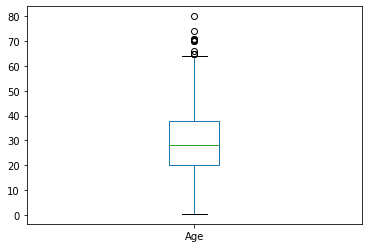

In [11]:
dt.Age.plot(kind='box') ## kind could be bar,pie,etc.

## For Categorical Variables

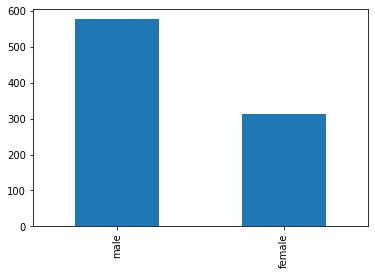

In [12]:
dt.Sex.value_counts().plot(kind = 'bar')

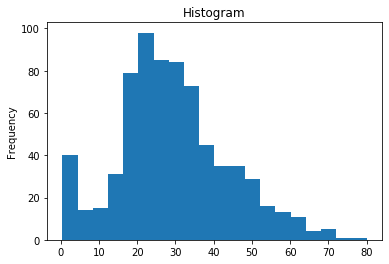

In [13]:
dt.Age.plot(kind = 'hist', title = 'Histogram',bins = 20)

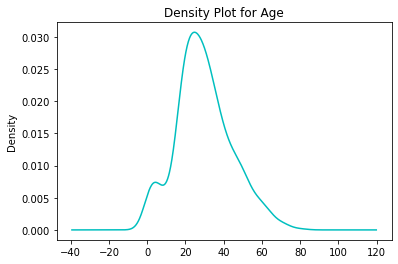

In [14]:
dt.Age.plot(kind = 'kde',title = 'Density Plot for Age', color = 'c')

In [15]:
print(dt.Fare.skew())
print(dt.Age.skew())

4.787316519674893
0.38910778230082704


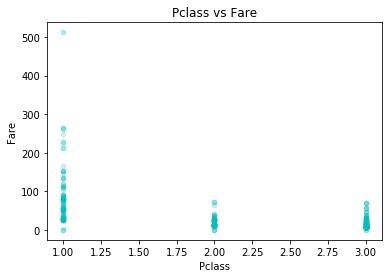

In [16]:
dt = pd.read_csv("train.csv")
dt.plot.scatter(x='Pclass',y='Fare', title = 'Pclass vs Fare', color = 'c', alpha = 0.1)

## Grouping And Aggregation

In [17]:
dt.groupby('Sex').Age.median()

Sex
female    27.0
male      29.0
Name: Age, dtype: float64

In [18]:
dt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
dt.groupby('Pclass').Age.median()

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [20]:
dt.groupby('Pclass').Fare.median()

Pclass
1    60.2875
2    14.2500
3     8.0500
Name: Fare, dtype: float64

In [21]:
dt.groupby('Pclass')['Fare','Age'].median()

,Fare,Age
Pclass,,
1,60.2875,37.0
2,14.2500,29.0
3,8.0500,24.0


In [22]:
dt.groupby('Pclass').agg({'Fare':'mean', 'Age':'median'})

,Fare,Age
Pclass,,
1,84.154687,37.0
2,20.662183,29.0
3,13.675550,24.0


In [23]:
aggregation = {'Fare':{'Mean_Fare':'mean',
                     'Median_Fare':'median',
                     'Min_Fare':np.min,
                     'Max_Fare':max},
               'Age':{'Mean_Age':'mean',
                     'Median_Age':'median',
                     'Min_Age':np.min,
                     'Max_Age':max,
                    'Range_Age': lambda x: max(x) - min(x)}}

In [25]:
#dt.groupby(['Pclass']).agg(aggregation)

In [26]:
dt.groupby(['Pclass','Embarked']).Fare.mean()

Pclass  Embarked
1       C           104.718529
        Q            90.000000
        S            70.364862
2       C            25.358335
        Q            12.350000
        S            20.327439
3       C            11.214083
        Q            11.183393
        S            14.644083
Name: Fare, dtype: float64

## Cross-Tabs

In [27]:
pd.crosstab(dt.Sex,dt.Pclass)

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


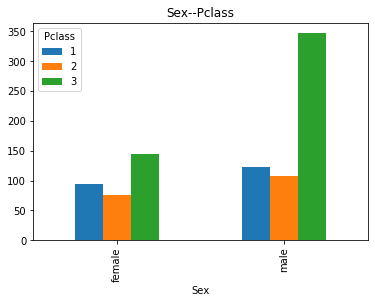

In [28]:
pd.crosstab(dt.Sex,dt.Pclass).plot(kind='bar', title = 'Sex--Pclass')

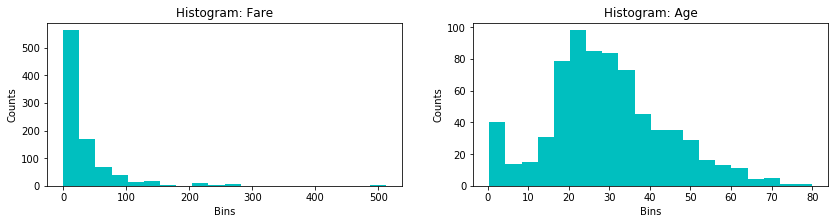

In [29]:
f, (ax1, ax2) = plt.subplots(1,2, figsize = (14,3))

ax1.hist(dt.Fare, bins =20, color = 'c')
ax1.set_title('Histogram: Fare')
ax1.set_xlabel('Bins')
ax1.set_ylabel('Counts')

ax2.hist(dt.Age, bins =20, color = 'c')
ax2.set_title('Histogram: Age')
ax2.set_xlabel('Bins')
ax2.set_ylabel('Counts')

plt.show()

## Pivot Table

In [30]:
dt.pivot_table(index='Sex', columns = 'Pclass', values = 'Age', aggfunc='mean')

Pclass,1,2,3
Sex,,,
female,34.611765,28.722973,21.750000
male,41.281386,30.740707,26.507589


In [31]:
dt.groupby(['Sex','Pclass']).Age.mean()

Sex     Pclass
female  1         34.611765
        2         28.722973
        3         21.750000
male    1         41.281386
        2         30.740707
        3         26.507589
Name: Age, dtype: float64

In [32]:
dt.groupby(['Sex','Pclass']).Age.mean().unstack()

Pclass,1,2,3
Sex,,,
female,34.611765,28.722973,21.750000
male,41.281386,30.740707,26.507589


## DATA MUNGING AND FEATURE EXTRACTION

In [33]:
dt[dt.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [34]:
pd.crosstab(dt.Survived, dt.Embarked)

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [35]:
dt.Embarked.fillna('S', inplace = True)

In [36]:
# med_fare = dt.loc[(dt['Pclass'] == 3) & (dt['Embarked'] == 'c'),'Fare'].median()
# print(med_fare)

In [37]:
age_median = dt.groupby('Sex').Age.transform('median')
dt.Age.fillna(age_median, inplace=True)
# print(age_median)

In [38]:
dt.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [39]:
## Another Option

def GetTitle(name):
    mg = name.split(',')[1]
    gg = mg.split('.')[0]
    return gg
mm = dt.Name.map(GetTitle)    

In [40]:
mm.unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer'], dtype=object)

In [41]:
def GetTitle(name):
    Title = {' Don': 'Sir',
         ' Rev':'Sir', 
         ' Mme':'Miss', 
         ' Ms':'Miss',
         ' Mlle':'Mr', 
         ' the Countess':'Lady',
         ' Jonkheer':'Sir',
        ' Major':'Sir',
         ' Lady':'Lady',
         ' Mr':'Mr',
         ' Miss':'Miss',
         ' Mrs':'Mrs',
         ' Master':'Master',
         ' Dr':'Sir',
         ' Sir':'Sir',
        ' Col':'Sir',
         ' Capt':'Sir'}
    mg = name.split(',')[1]
    gg = mg.split('.')[0]
    return Title[gg]


dt['Title'] = dt.Name.map(GetTitle)

In [42]:
dt.Fare.isnull().sum()

0

In [43]:
dt.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss


In [44]:
title_age_median = dt.groupby('Title').Age.transform('median')

In [45]:
dt.fillna(title_age_median, inplace=True)

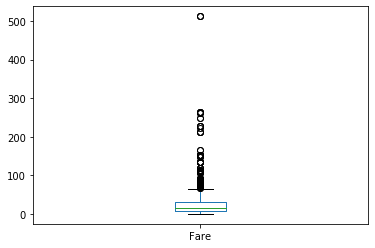

In [46]:
dt.Fare.plot(kind = 'box')

In [47]:
dt.loc[(dt.Fare)>= 500]
dt['Fare'] = np.log(dt['Fare'] + 1.0 )

## Binning


In [48]:
dt['Fare_bin'] = pd.qcut(dt.Fare,4, labels =['very low','low','fair','high'])

### Feature Engineering

##### Age Property

In [49]:
dt['Age_State'] = np.where(dt['Age']>=18,'Adult','Child')

In [50]:
pd.crosstab(dt.Survived,dt.Age_State)  ## to know the number of children or adult that survived

Age_State,Adult,Child
Survived,,
0,497,52
1,281,61


#### Family Size Property

In [51]:
dt['Family_Size'] = dt['Parch'] + dt['SibSp'] + 1


In [52]:
dt.Family_Size[dt.Family_Size>= 8]=8

In [53]:
pd.crosstab(dt.Survived,dt.Family_Size) 

Family_Size,1,2,3,4,5,6,7,8
Survived,,,,,,,,
0,374,72,43,8,12,19,8,13
1,163,89,59,21,3,3,4,0


#### IsMother Property

In [54]:
dt['Mother'] = np.where((dt['Sex'] == 'female') & (dt['Parch']>0) & (dt['Age'] >18) & (dt['Title'] != 'Miss'), 1,0)

In [55]:
pd.crosstab(dt.Survived, dt.Mother)

Mother,0,1
Survived,,
0,533,16
1,303,39


## CATEGORICAL FEATURES ENCODING

#### Label and One-Hot Encoding

In [56]:
dt['IsMale'] = np.where((dt.Sex == 'male'),1,0)
dt = pd.get_dummies(dt, columns = ['Pclass','Title','Fare_bin','Embarked','Age_State'])
dt.drop(['Cabin','Name','Sex','Ticket','Parch','SibSp'], axis=1, inplace = True) ## Dropping columns

### Reordering Columns

In [57]:
column = ['Survived'] + [column for column in dt.columns if column != 'Survived']
dt = dt[column]

In [58]:
dt.head()

,Survived,PassengerId,Age,Fare,Family_Size,Mother,IsMale,Pclass_1,Pclass_2,Pclass_3,...,Title_Sir,Fare_bin_very low,Fare_bin_low,Fare_bin_fair,Fare_bin_high,Embarked_C,Embarked_Q,Embarked_S,Age_State_Adult,Age_State_Child
0,0,1,22.0,2.110213,2,0,1,0,0,1,...,0,1,0,0,0,0,0,1,1,0
1,1,2,38.0,4.280593,2,0,0,1,0,0,...,0,0,0,0,1,1,0,0,1,0
2,1,3,26.0,2.188856,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,1,0
3,1,4,35.0,3.990834,2,0,0,1,0,0,...,0,0,0,0,1,0,0,1,1,0
4,0,5,35.0,2.202765,1,0,1,0,0,1,...,0,0,1,0,0,0,0,1,1,0


In [59]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Survived           891 non-null    int64  
 1   PassengerId        891 non-null    int64  
 2   Age                891 non-null    float64
 3   Fare               891 non-null    float64
 4   Family_Size        891 non-null    int64  
 5   Mother             891 non-null    int32  
 6   IsMale             891 non-null    int32  
 7   Pclass_1           891 non-null    uint8  
 8   Pclass_2           891 non-null    uint8  
 9   Pclass_3           891 non-null    uint8  
 10  Title_Lady         891 non-null    uint8  
 11  Title_Master       891 non-null    uint8  
 12  Title_Miss         891 non-null    uint8  
 13  Title_Mr           891 non-null    uint8  
 14  Title_Mrs          891 non-null    uint8  
 15  Title_Sir          891 non-null    uint8  
 16  Fare_bin_very low  891 non

In [60]:
dt.drop('PassengerId',axis = 1, inplace = True)

## MODEL BUILDING

In [61]:
X= dt.drop('Survived', axis=1)
y=dt.Survived

In [62]:
dt.head()

,Survived,Age,Fare,Family_Size,Mother,IsMale,Pclass_1,Pclass_2,Pclass_3,Title_Lady,...,Title_Sir,Fare_bin_very low,Fare_bin_low,Fare_bin_fair,Fare_bin_high,Embarked_C,Embarked_Q,Embarked_S,Age_State_Adult,Age_State_Child
0,0,22.0,2.110213,2,0,1,0,0,1,0,...,0,1,0,0,0,0,0,1,1,0
1,1,38.0,4.280593,2,0,0,1,0,0,0,...,0,0,0,0,1,1,0,0,1,0
2,1,26.0,2.188856,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,1,0
3,1,35.0,3.990834,2,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,1,0
4,0,35.0,2.202765,1,0,1,0,0,1,0,...,0,0,1,0,0,0,0,1,1,0


In [63]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler= MinMaxScaler()
# X = scaler.fit_transform(X)

In [64]:
# from sklearn import preprocessing
# X = preprocessing.scale(X).astype(float)

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=19)

In [67]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [68]:
from sklearn.linear_model import LogisticRegression

In [69]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
lr.score(X_train,y_train)
y_train = y_train.astype('int')

In [70]:
pred = lr.predict(X_test)

In [71]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       188
           1       0.82      0.71      0.76       109

    accuracy                           0.84       297
   macro avg       0.83      0.81      0.82       297
weighted avg       0.83      0.84      0.83       297



In [72]:
accuracy_score(y_test, pred)

0.835016835016835

## HyperParameter Optimization

In [1525]:
Lr = LogisticRegression(random_state = 0)
from sklearn.model_selection import GridSearchCV

In [1526]:
parameters={'C':[1.0, 10.0, 50.0, 100.0, 1000.0], 'penalty':['l1', 'l2']}
clf = GridSearchCV(Lr, param_grid = parameters, cv = 3)

In [1527]:
clf.fit(X_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1.0, 10.0, 50.0, 100.0, 1000.0],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [1528]:
clf.best_params_

{'C': 1.0, 'penalty': 'l2'}

In [1529]:
param = {'C':1.0,'penalty':'l1'}


In [1530]:
clf.score(X_test,y_test)

0.835016835016835

In [1531]:
clf.best_score_

0.8181818181818182

In [1532]:
pred = clf.predict(X_test)

In [1533]:
accuracy_score(y_test, pred)

0.835016835016835

## GRADIENT BOOSTING

In [1545]:
from sklearn.ensemble import GradientBoostingClassifier

In [1546]:
ll = GradientBoostingClassifier(random_state = 10)
from sklearn.model_selection import GridSearchCV

In [1547]:
parameter = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators': [100,250,500,750,1000,1250,1500,1750]}
tune = GridSearchCV(estimator = GradientBoostingClassifier(max_depth = 4, min_samples_split = 2, min_samples_leaf = 1, subsample = 1, max_features = 'sqrt', random_state = 10), param_grid = parameter, scoring = 'accuracy', n_jobs = 4, iid=False, cv=3)

In [1548]:
tune.fit(X_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=4,
                                                  max_features='sqrt',
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  presor

In [1549]:
print(tune.best_params_)
print(tune.best_score_)

{'learning_rate': 0.001, 'n_estimators': 1750}
0.8182471777094639


In [1550]:
model = GradientBoostingClassifier(learning_rate = 0.001, n_estimators = 1750, max_depth = 4, min_samples_split = 2, min_samples_leaf = 1, subsample = 1, max_features = 'sqrt', random_state = 10)

In [1551]:
model.fit(X_train,y_train)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.001, loss='deviance', max_depth=4,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=1750,
                           n_iter_no_change=None, presort='auto',
                           random_state=10, subsample=1, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [1552]:
pred = model.predict(X_test)

In [1553]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88       188
           1       0.84      0.70      0.76       109

    accuracy                           0.84       297
   macro avg       0.84      0.81      0.82       297
weighted avg       0.84      0.84      0.84       297



In [1554]:
accuracy_score(y_test, pred)

0.8417508417508418

In [1425]:
dt2 = pd.read_csv('test.csv')

In [1426]:
dt2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [1427]:
# frt = {1:'Low Level', 2:'Medium Level', 3:'High Level'}
# dt2.Pclass = dt2['Pclass'].map(frt)

In [1428]:
aggregation = {'Fare':{'Mean_Fare':'mean',
                     'Median_Fare':'median',
                     'Min_Fare':np.min,
                     'Max_Fare':max},
               'Age':{'Mean_Age':'mean',
                     'Median_Age':'median',
                     'Min_Age':np.min,
                     'Max_Age':max,
                    'Range_Age': lambda x: max(x) - min(x)}}

In [1429]:

dt2.groupby(['Pclass']).agg(aggregation)

Fare                                       Age             \
        Mean_Fare Median_Fare Min_Fare  Max_Fare   Mean_Age Median_Age   
Pclass                                                                   
1       94.280297     60.0000   0.0000  512.3292  40.918367       42.0   
2       22.202104     15.7500   9.6875   73.5000  28.777500       26.5   
3       12.459678      7.8958   3.1708   69.5500  24.027945       24.0   

                                  
       Min_Age Max_Age Range_Age  
Pclass                            
1         6.00    76.0     70.00  
2         0.92    63.0     62.08  
3         0.17    60.5     60.33

In [1430]:
dt2.Embarked.fillna('S', inplace = True)

In [1431]:
age_median = dt2.groupby('Sex').Age.transform('median')
dt2.Age.fillna(age_median, inplace=True)

In [1432]:
def GetTitle(name):
    mg = name.split(',')[1]
    gg = mg.split('.')[0]
    return gg
mm = dt2.Name.map(GetTitle)    

In [1433]:
mm.unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Ms', ' Col', ' Rev', ' Dr',
       ' Dona'], dtype=object)

In [1434]:
def GetTitle(name):
    Title = {' Don': 'Sir',
         ' Rev':'Sir', 
         ' Mme':'Miss', 
         ' Ms':'Miss',
         ' Mlle':'Mr', 
         ' the Countess':'Lady',
         ' Jonkheer':'Sir',
        ' Major':'Sir',
         ' Dona':'Lady',
         ' Mr':'Mr',
         ' Miss':'Miss',
         ' Mrs':'Mrs',
         ' Master':'Master',
         ' Dr':'Sir',
         ' Sir':'Sir',
        ' Col':'Sir',
         ' Capt':'Sir'}
    mg = name.split(',')[1]
    gg = mg.split('.')[0]
    return Title[gg]


dt2['Title'] = dt2.Name.map(GetTitle)

In [1435]:
title_age_median = dt2.groupby('Title').Age.transform('median')

In [1436]:
dt2.fillna(title_age_median, inplace=True)

In [1437]:
dt2.loc[(dt.Fare)>= 500]
dt2['Fare'] = np.log(dt2['Fare'] + 1.0 )

In [1438]:
dt2['Fare_bin'] = pd.qcut(dt2.Fare,4, labels =['very low','low','fair','high'])
dt2['Family_Size'] = dt2['Parch'] + dt2['SibSp'] + 1

In [1439]:
dt2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fare_bin,Family_Size
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,2.178064,NaN,Q,Mr,very low,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,2.079442,NaN,S,Mrs,very low,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,2.369075,NaN,Q,Mr,low,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,2.268252,NaN,S,Mr,low,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,2.586824,NaN,S,Mrs,low,3


In [1440]:
dt2['Age_State'] = np.where(dt2['Age']>=18,'Adult','Child')
dt2['Family_Size'] = dt2['Parch'] + dt2['SibSp'] + 1
dt2.Family_Size[dt2.Family_Size>= 8]=8
dt2['Mother'] = np.where((dt2['Sex'] == 'female') & (dt2['Parch']>0) & (dt2['Age'] >18) & (dt2['Title'] != 'Miss'), 1,0)

In [1441]:
dt2['IsMale'] = np.where((dt2.Sex == 'male'),1,0)
dt2 = pd.get_dummies(dt2, columns = ['Pclass','Title','Fare_bin','Embarked','Age_State'])
dt2.drop(['Cabin','Name','Sex','Ticket','Parch','SibSp'], axis=1, inplace = True) ## Dropping columns

In [1442]:
dt2[dt2.columns] = preprocessing.scale(dt2)

In [1443]:
dt2.head()

,PassengerId,Age,Fare,Family_Size,Mother,IsMale,Pclass_1,Pclass_2,Pclass_3,Title_Lady,...,Title_Sir,Fare_bin_very low,Fare_bin_low,Fare_bin_fair,Fare_bin_high,Embarked_C,Embarked_Q,Embarked_S,Age_State_Adult,Age_State_Child
0,-1.727912,0.386231,-0.866767,-0.594432,-0.278064,0.755929,-0.586559,-0.534933,0.957826,-0.04897,...,-0.11003,1.632993,-0.546019,-0.579192,-0.568142,-0.568142,2.843757,-1.350676,0.329778,-0.329778
1,-1.719625,1.371370,-0.968773,0.138526,-0.278064,-1.322876,-0.586559,-0.534933,0.957826,-0.04897,...,-0.11003,1.632993,-0.546019,-0.579192,-0.568142,-0.568142,-0.351647,0.740370,0.329778,-0.329778
2,-1.711337,2.553537,-0.669205,-0.594432,-0.278064,0.755929,-0.586559,1.869391,-1.044031,-0.04897,...,-0.11003,-0.612372,1.831438,-0.579192,-0.568142,-0.568142,2.843757,-1.350676,0.329778,-0.329778
3,-1.703050,-0.204852,-0.773486,-0.594432,-0.278064,0.755929,-0.586559,-0.534933,0.957826,-0.04897,...,-0.11003,-0.612372,1.831438,-0.579192,-0.568142,-0.568142,-0.351647,0.740370,0.329778,-0.329778
4,-1.694763,-0.598908,-0.443987,0.871483,3.596294,-1.322876,-0.586559,-0.534933,0.957826,-0.04897,...,-0.11003,-0.612372,1.831438,-0.579192,-0.568142,-0.568142,-0.351647,0.740370,0.329778,-0.329778


In [1444]:
dt.columns

Index(['Survived', 'Age', 'Fare', 'Family_Size', 'Mother', 'IsMale',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Title_Lady', 'Title_Master',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Sir', 'Fare_bin_very low',
       'Fare_bin_low', 'Fare_bin_fair', 'Fare_bin_high', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Age_State_Adult', 'Age_State_Child'],
      dtype='object')

In [1445]:
dt2.columns

Index(['PassengerId', 'Age', 'Fare', 'Family_Size', 'Mother', 'IsMale',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Title_Lady', 'Title_Master',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Sir', 'Fare_bin_very low',
       'Fare_bin_low', 'Fare_bin_fair', 'Fare_bin_high', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Age_State_Adult', 'Age_State_Child'],
      dtype='object')

In [1446]:
column = [column for column in dt2.columns if column != 'Survived']
dt2 = dt2[column]

In [1447]:
dp = pd.read_csv('test.csv')

In [1448]:
dt2['PassengerId'] = dp['PassengerId']

In [1449]:
dt2['Fare'].fillna(dt2.Fare.mean(), inplace=True)

In [1450]:
# from sklearn.ensemble import RandomForestClassifier
# rfc = RandomForestClassifier().fit(X_train,y_train)

In [1451]:
# from sklearn.tree import DecisionTreeClassifier
# dtc = DecisionTreeClassifier().fit(X_train,y_train)


In [1452]:
test_prediction = model.predict(dt2.drop(['PassengerId'], axis =1))

In [1453]:
output = pd.DataFrame({'PassengerId' : dt2['PassengerId'], "Survived": test_prediction})

In [1454]:
output.head(5)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [1455]:
output.to_csv('submission3.csv', index = False)

## DECISION TREE

In [1028]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier().fit(X_train,y_train)
d_pred = dtc.predict(X_test)


In [1029]:
print(classification_report(y_test,d_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       188
           1       0.74      0.69      0.71       109

    accuracy                           0.80       297
   macro avg       0.78      0.77      0.78       297
weighted avg       0.80      0.80      0.80       297



In [1030]:
accuracy_score(y_test, d_pred)

0.797979797979798

## Random Forest

In [1031]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [1033]:
rfc.fit(X_train,y_train)
rfc.score(X_train,y_train)

0.9595959595959596

In [1034]:
rfc_pred = rfc.predict(X_test)

In [1035]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       188
           1       0.79      0.67      0.73       109

    accuracy                           0.81       297
   macro avg       0.81      0.78      0.79       297
weighted avg       0.81      0.81      0.81       297



In [1036]:
accuracy_score(y_test, rfc_pred)

0.8148148148148148